In [95]:
import pandas as pd
import numpy as np

In [96]:
df0=pd.read_csv('C:\\Users\\user\\OneDrive\\Documents\\카카오톡 받은 파일\\final_animal_visit_travel (1).csv',encoding='cp949')

In [97]:
df0=df0.drop(df0[df0.시군구=='성북구'].index)

In [98]:
df0=df0.drop(df0[df0.시군구=='인천광역시 동구'].index)

In [99]:
df=df0.drop(columns=['시군구'])
df

,방문자 수,관광명소,기타,숙박,음식점,카페,A10,A11,A12
0,22105529,13,11,223,35,37,4.17,3.95,3.99
1,103309405,2,11,3,10,36,4.10,4.13,3.98
2,23706460,2,6,1,2,18,3.60,3.92,3.96
3,26260986,8,11,70,33,33,4.27,4.13,3.75
4,18328235,1,5,1,6,19,4.50,4.00,3.89
...,...,...,...,...,...,...,...,...,...
224,15071693,5,5,69,6,8,4.26,4.15,4.08
225,51736786,13,25,24,9,66,4.19,4.02,3.98
226,7963778,4,4,4,2,8,4.41,4.16,3.97
227,2428709,3,2,11,0,0,4.00,4.23,4.11


In [78]:
df.isnull().sum()

방문자 수    0
관광명소     0
기타       0
숙박       0
음식점      0
카페       0
A10      0
A11      0
A12      0
dtype: int64

In [100]:
df

,방문자 수,관광명소,기타,숙박,음식점,카페,A10,A11,A12
0,22105529,13,11,223,35,37,4.17,3.95,3.99
1,103309405,2,11,3,10,36,4.10,4.13,3.98
2,23706460,2,6,1,2,18,3.60,3.92,3.96
3,26260986,8,11,70,33,33,4.27,4.13,3.75
4,18328235,1,5,1,6,19,4.50,4.00,3.89
...,...,...,...,...,...,...,...,...,...
224,15071693,5,5,69,6,8,4.26,4.15,4.08
225,51736786,13,25,24,9,66,4.19,4.02,3.98
226,7963778,4,4,4,2,8,4.41,4.16,3.97
227,2428709,3,2,11,0,0,4.00,4.23,4.11


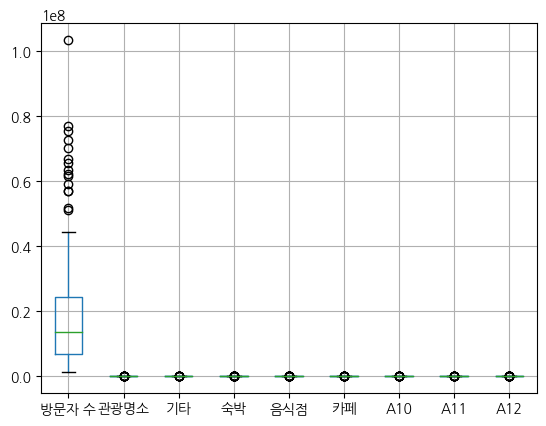

In [110]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
df.boxplot()
plt.show()

In [102]:
from scipy.stats import shapiro


# 샤피로 검정 결과를 담을 빈 리스트 생성
shapiro_results = []

# 각 열(변수)에 대해 샤피로 검정 수행
for col in df.columns:
    statistic, p_value = shapiro(df[col])
    shapiro_results.append({'Variable': col, 'Statistic': statistic, 'p-value': p_value})

# 샤피로 검정 결과를 데이터프레임으로 정리
shapiro_df = pd.DataFrame(shapiro_results)

print(shapiro_df)


  Variable  Statistic       p-value
0    방문자 수   0.798908  2.118181e-16
1     관광명소   0.519959  1.719779e-24
2       기타   0.752769  3.656171e-18
3       숙박   0.466843  1.386014e-25
4      음식점   0.717515  2.361889e-19
5       카페   0.770004  1.552079e-17
6      A10   0.874443  9.543291e-13
7      A11   0.830650  5.218780e-15
8      A12   0.697094  5.419479e-20


#####  p-value > 유의수준 (예: 0.05):

- 귀무가설을 기각할 수 없습니다. 데이터는 정규분포를 따른다는 증거가 있습니다.
- "데이터가 정규분포를 따른다"라고 해석할 수 있습니다.


##### p-value <= 유의수준 (예: 0.05):

- 귀무가설을 기각합니다.
- 데이터는 정규분포를 따른다는 증거가 부족합니다.
- "데이터가 정규분포를 따르지 않는다"라고 해석할 수 있습니다.

In [103]:
df['방문자 수']

0       22105529
1      103309405
2       23706460
3       26260986
4       18328235
         ...    
224     15071693
225     51736786
226      7963778
227      2428709
228      8176074
Name: 방문자 수, Length: 227, dtype: int64

#### 정규성을 충족하지 않는 비모수 데이터에 대해 사용하는 levene test

In [9]:
from scipy.stats import levene

levene(df['방문자 수'],
      df['관광명소'],
      df['기타'],
      df['숙박'],
      df['음식점'],
      df['카페'],center='median')
#등분산성없음

LeveneResult(statistic=166.27558712295695, pvalue=2.8037086405649575e-138)

In [10]:
levene(df['A10'],
      df['A11'],
      df['A12'],
      center='median')
#등분산성있음

LeveneResult(statistic=0.1928344661799001, pvalue=0.8246632792055606)

In [104]:
from sklearn.preprocessing import MinMaxScaler

df1=df.drop(columns=['방문자 수'])

# Min-Max 스케일링 객체 생성
scaler = MinMaxScaler()

# 데이터를 Min-Max 스케일링 적용
scaled_data = scaler.fit_transform(df1)

# 결과 출력
print("Scaled Data:")
print(scaled_data)


Scaled Data:
[[0.24074074 0.21153846 0.97807018 ... 0.66857143 0.60509554 0.74531835]
 [0.03703704 0.21153846 0.01315789 ... 0.62857143 0.71974522 0.74157303]
 [0.03703704 0.11538462 0.00438596 ... 0.34285714 0.58598726 0.7340824 ]
 ...
 [0.07407407 0.07692308 0.01754386 ... 0.80571429 0.7388535  0.73782772]
 [0.05555556 0.03846154 0.04824561 ... 0.57142857 0.78343949 0.79026217]
 [0.03703704 0.         0.13596491 ... 0.61714286 0.78980892 0.79775281]]


In [82]:
scaled_df=pd.DataFrame(scaled_data,columns=df1.columns)
scaled_df

,관광명소,기타,숙박,음식점,카페,A10,A11,A12
0,0.240741,0.211538,0.978070,0.795455,0.377551,0.668571,0.605096,0.745318
1,0.037037,0.211538,0.013158,0.227273,0.367347,0.628571,0.719745,0.741573
2,0.037037,0.115385,0.004386,0.045455,0.183673,0.342857,0.585987,0.734082
3,0.148148,0.211538,0.307018,0.750000,0.336735,0.725714,0.719745,0.655431
4,0.018519,0.096154,0.004386,0.136364,0.193878,0.857143,0.636943,0.707865
...,...,...,...,...,...,...,...,...
222,0.092593,0.096154,0.302632,0.136364,0.081633,0.720000,0.732484,0.779026
223,0.240741,0.480769,0.105263,0.204545,0.673469,0.680000,0.649682,0.741573
224,0.074074,0.076923,0.017544,0.045455,0.081633,0.805714,0.738854,0.737828
225,0.055556,0.038462,0.048246,0.000000,0.000000,0.571429,0.783439,0.790262


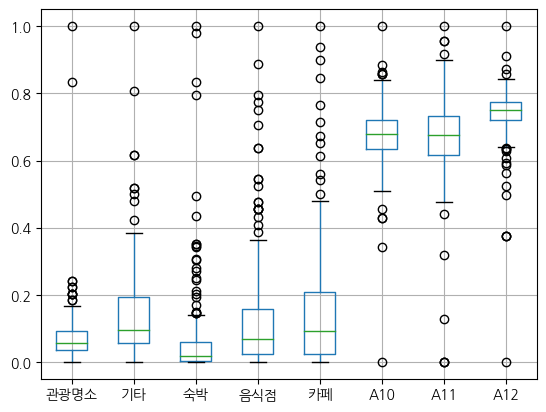

In [83]:
scaled_df.boxplot()
plt.show()

In [105]:
df2=df['방문자 수']

In [54]:
#로버스트안하기로.
from sklearn.preprocessing import RobustScaler


# RobustScaler 객체 생성
scaler = RobustScaler()

# 데이터를 로버스트 스케일링 적용
scaled_data2 = scaler.fit_transform(df2.values.reshape(-1,1))

# 스케일링된 데이터로 새로운 데이터프레임 생성
scaled_df2 = pd.DataFrame(scaled_data2, columns=['방문자 수'])

# 로버스트 스케일링된 데이터프레임 출력
scaled_df2


,방문자 수
0,0.492820
1,5.121601
2,0.584076
3,0.729689
4,0.277507
...,...
224,0.091877
225,2.181860
226,-0.313288
227,-0.628798


In [85]:
ddf=pd.concat([scaled_df,scaled_df2],axis=1)
ddf

NameError: name 'scaled_df2' is not defined

In [111]:
ddf.boxplot()
plt.show()


NameError: name 'ddf' is not defined

In [107]:
df2

0       22105529
1      103309405
2       23706460
3       26260986
4       18328235
         ...    
224     15071693
225     51736786
226      7963778
227      2428709
228      8176074
Name: 방문자 수, Length: 227, dtype: int64

In [108]:
#로그변환이용
logdata=np.log(df2)
print(logdata)

0      16.911338
1      18.453239
2      16.981258
3      17.083595
4      16.723953
         ...    
224    16.528329
225    17.761680
226    15.890414
227    14.702870
228    15.916723
Name: 방문자 수, Length: 227, dtype: float64


In [112]:
logdata.boxplot()
plt.show()

AttributeError: 'Series' object has no attribute 'boxplot'

In [68]:
#제곱근변환 (x)
sqrtdata=np.sqrt(df2)
print(sqrtdata)

0       4701.651731
1      10164.123425
2       4868.928013
3       5124.547395
4       4281.148794
           ...     
224     3882.227840
225     7192.828790
226     2822.016655
227     1558.431583
228     2859.383500
Name: 방문자 수, Length: 229, dtype: float64


In [17]:
#로그변환후 로버스트스케일링 (x)
scaled_log = scaler.fit_transform(logdata.values.reshape(-1,1))

# 스케일링된 데이터로 새로운 데이터프레임 생성
scaled_logdata = pd.DataFrame(scaled_log, columns=['방문자 수'])

# 로버스트 스케일링된 데이터프레임 출력
scaled_logdata

,방문자 수
0,0.642938
1,1.000000
2,0.659129
3,0.682828
4,0.599545
...,...
224,0.554243
225,0.839854
226,0.406520
227,0.131517


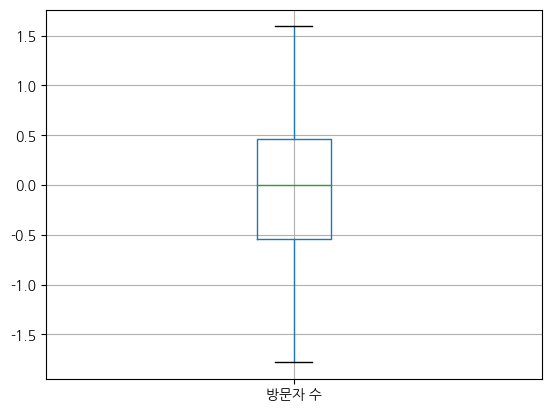

In [74]:
scaled_logdata.boxplot()
plt.show()

In [18]:
# 샤피로 검정 수행
statistic, p_value = shapiro(logdata)

# 결과 출력
print("Shapiro-Wilk test statistic:", statistic)
print("p-value:", p_value)

# 보통 0.05 (5%) 유의수준을 사용하여 검정 결과 해석 가능
if p_value > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk test statistic: 0.9932217001914978
p-value: 0.3821486532688141
데이터는 정규 분포를 따릅니다.


In [87]:
#로그변환한거 정규분포 따름. 하지만 범위 맞춰주기 위해 민맥스스케일링 사용
from sklearn.preprocessing import MinMaxScaler

minmax_scaler=MinMaxScaler()
minmax_scaled_logdata=minmax_scaler.fit_transform(logdata.values.reshape(-1,1))
minmax_scaled_logdata


array([[0.64293779],
       [1.        ],
       [0.65912932],
       [0.68282774],
       [0.59954453],
       [0.80425929],
       [0.4933711 ],
       [0.23097615],
       [0.58167483],
       [0.29733876],
       [0.37418135],
       [0.5807183 ],
       [0.77134722],
       [0.15206341],
       [0.25324202],
       [0.92663365],
       [0.36192478],
       [0.35042491],
       [0.25948264],
       [0.53729273],
       [0.49486459],
       [0.70333193],
       [0.61894932],
       [0.42569233],
       [0.65129598],
       [0.49627066],
       [0.59228159],
       [0.63615211],
       [0.67327799],
       [0.66626932],
       [0.71343417],
       [0.36971314],
       [0.27451457],
       [0.70703712],
       [0.54705044],
       [0.54186132],
       [0.54332056],
       [0.27432398],
       [0.51862305],
       [0.35113105],
       [0.59257851],
       [0.37379018],
       [0.4404165 ],
       [0.68931152],
       [0.67674597],
       [0.4582332 ],
       [0.73011948],
       [0.377

In [88]:
msl=pd.DataFrame(minmax_scaled_logdata,columns=['방문자 수'])
msl

,방문자 수
0,0.642938
1,1.000000
2,0.659129
3,0.682828
4,0.599545
...,...
222,0.554243
223,0.839854
224,0.406520
225,0.131517


In [89]:
ddf2=pd.concat([scaled_df,msl],axis=1)
ddf2

,관광명소,기타,숙박,음식점,카페,A10,A11,A12,방문자 수
0,0.240741,0.211538,0.978070,0.795455,0.377551,0.668571,0.605096,0.745318,0.642938
1,0.037037,0.211538,0.013158,0.227273,0.367347,0.628571,0.719745,0.741573,1.000000
2,0.037037,0.115385,0.004386,0.045455,0.183673,0.342857,0.585987,0.734082,0.659129
3,0.148148,0.211538,0.307018,0.750000,0.336735,0.725714,0.719745,0.655431,0.682828
4,0.018519,0.096154,0.004386,0.136364,0.193878,0.857143,0.636943,0.707865,0.599545
...,...,...,...,...,...,...,...,...,...
222,0.092593,0.096154,0.302632,0.136364,0.081633,0.720000,0.732484,0.779026,0.554243
223,0.240741,0.480769,0.105263,0.204545,0.673469,0.680000,0.649682,0.741573,0.839854
224,0.074074,0.076923,0.017544,0.045455,0.081633,0.805714,0.738854,0.737828,0.406520
225,0.055556,0.038462,0.048246,0.000000,0.000000,0.571429,0.783439,0.790262,0.131517


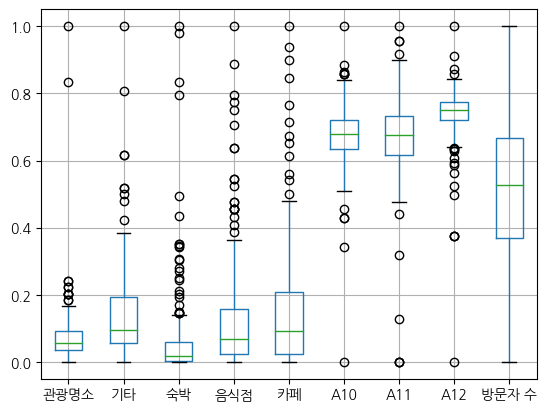

In [90]:
ddf2.boxplot()
plt.rc('axes', unicode_minus=False)
plt.show()


In [91]:
ddf2

,관광명소,기타,숙박,음식점,카페,A10,A11,A12,방문자 수
0,0.240741,0.211538,0.978070,0.795455,0.377551,0.668571,0.605096,0.745318,0.642938
1,0.037037,0.211538,0.013158,0.227273,0.367347,0.628571,0.719745,0.741573,1.000000
2,0.037037,0.115385,0.004386,0.045455,0.183673,0.342857,0.585987,0.734082,0.659129
3,0.148148,0.211538,0.307018,0.750000,0.336735,0.725714,0.719745,0.655431,0.682828
4,0.018519,0.096154,0.004386,0.136364,0.193878,0.857143,0.636943,0.707865,0.599545
...,...,...,...,...,...,...,...,...,...
222,0.092593,0.096154,0.302632,0.136364,0.081633,0.720000,0.732484,0.779026,0.554243
223,0.240741,0.480769,0.105263,0.204545,0.673469,0.680000,0.649682,0.741573,0.839854
224,0.074074,0.076923,0.017544,0.045455,0.081633,0.805714,0.738854,0.737828,0.406520
225,0.055556,0.038462,0.048246,0.000000,0.000000,0.571429,0.783439,0.790262,0.131517


In [92]:
ddf2['시군구']=df0['시군구']

In [93]:
ddf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   관광명소    227 non-null    float64
 1   기타      227 non-null    float64
 2   숙박      227 non-null    float64
 3   음식점     227 non-null    float64
 4   카페      227 non-null    float64
 5   A10     227 non-null    float64
 6   A11     227 non-null    float64
 7   A12     227 non-null    float64
 8   방문자 수   227 non-null    float64
 9   시군구     225 non-null    object 
dtypes: float64(9), object(1)
memory usage: 17.9+ KB


In [94]:
ddf2.to_csv('문화관광스케일링1.csv',index=False,encoding='cp949')

## pca

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=0.95)  # 누적 설명 분산 비율이 95%가 되도록 주성분 개수를 선택합니다.
pca_result = pca.fit_transform(ddf2)


ValueError: could not convert string to float: '가평군'

In [37]:
from sklearn.preprocessing import LabelEncoder

# 데이터프레임의 문자형 변수에 레이블 인코딩 적용
label_encoder = LabelEncoder()
ddf2['시군구'] = label_encoder.fit_transform(ddf2['시군구'])


In [38]:
ddf2['시군구']

0        0
1        1
2        2
3        3
4        4
      ... 
224    224
225    225
226    226
227    227
228    228
Name: 시군구, Length: 229, dtype: int32

In [39]:
#시군구 minmax하기
from sklearn.preprocessing import MinMaxScaler

minmax_scaler=MinMaxScaler()
minmax_scaled_sigun=minmax_scaler.fit_transform(ddf2['시군구'].values.reshape(-1,1))
minmax_scaled_sigun

array([[0.        ],
       [0.00438596],
       [0.00877193],
       [0.01315789],
       [0.01754386],
       [0.02192982],
       [0.02631579],
       [0.03070175],
       [0.03508772],
       [0.03947368],
       [0.04385965],
       [0.04824561],
       [0.05263158],
       [0.05701754],
       [0.06140351],
       [0.06578947],
       [0.07017544],
       [0.0745614 ],
       [0.07894737],
       [0.08333333],
       [0.0877193 ],
       [0.09210526],
       [0.09649123],
       [0.10087719],
       [0.10526316],
       [0.10964912],
       [0.11403509],
       [0.11842105],
       [0.12280702],
       [0.12719298],
       [0.13157895],
       [0.13596491],
       [0.14035088],
       [0.14473684],
       [0.14912281],
       [0.15350877],
       [0.15789474],
       [0.1622807 ],
       [0.16666667],
       [0.17105263],
       [0.1754386 ],
       [0.17982456],
       [0.18421053],
       [0.18859649],
       [0.19298246],
       [0.19736842],
       [0.20175439],
       [0.206

In [40]:
ms2=pd.DataFrame(minmax_scaled_sigun,columns=['시군구'])
ms2

,시군구
0,0.000000
1,0.004386
2,0.008772
3,0.013158
4,0.017544
...,...
224,0.982456
225,0.986842
226,0.991228
227,0.995614


In [47]:
ddf3=pd.concat([scaled_df,ms2],axis=1)
ddf3

,관광명소,기타,숙박,음식점,카페,A10,A11,A12,시군구
0,0.240741,0.211538,0.978070,0.795455,0.377551,0.877895,0.864333,0.854390,0.000000
1,0.037037,0.211538,0.013158,0.227273,0.367347,0.863158,0.903720,0.852248,0.004386
2,0.037037,0.115385,0.004386,0.045455,0.183673,0.757895,0.857768,0.847966,0.008772
3,0.148148,0.211538,0.307018,0.750000,0.336735,0.898947,0.903720,0.802998,0.013158
4,0.018519,0.096154,0.004386,0.136364,0.193878,0.947368,0.875274,0.832976,0.017544
...,...,...,...,...,...,...,...,...,...
224,0.092593,0.096154,0.302632,0.136364,0.081633,0.896842,0.908096,0.873662,0.982456
225,0.240741,0.480769,0.105263,0.204545,0.673469,0.882105,0.879650,0.852248,0.986842
226,0.074074,0.076923,0.017544,0.045455,0.081633,0.928421,0.910284,0.850107,0.991228
227,0.055556,0.038462,0.048246,0.000000,0.000000,0.842105,0.925602,0.880086,0.995614


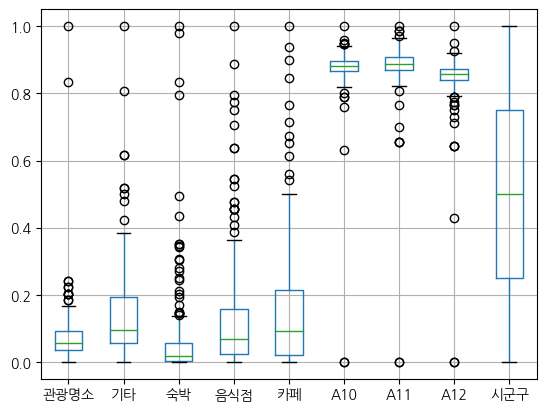

In [48]:
ddf3.boxplot()
plt.show()

In [54]:
from sklearn import decomposition
#PCA를 진행하여 fit한 데이터셋으로 만들어 줌.
pca = decomposition.PCA(n_components = 4)
pc = pca.fit_transform(ddf3)

#데이터프레임으로 만들어주며 PC로 변환한 값을 만들어준 뒤 cluster라는 새로운 행을 만듦.
pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pc_df.head()

,PC1,PC2,PC3,PC4
0,-0.407129,0.891051,-0.218459,0.635726
1,-0.485727,0.228760,0.020004,-0.142635
2,-0.497730,-0.032971,0.061550,-0.040074
3,-0.441233,0.632855,-0.053011,0.139710
4,-0.485929,0.019555,-0.031370,-0.076760


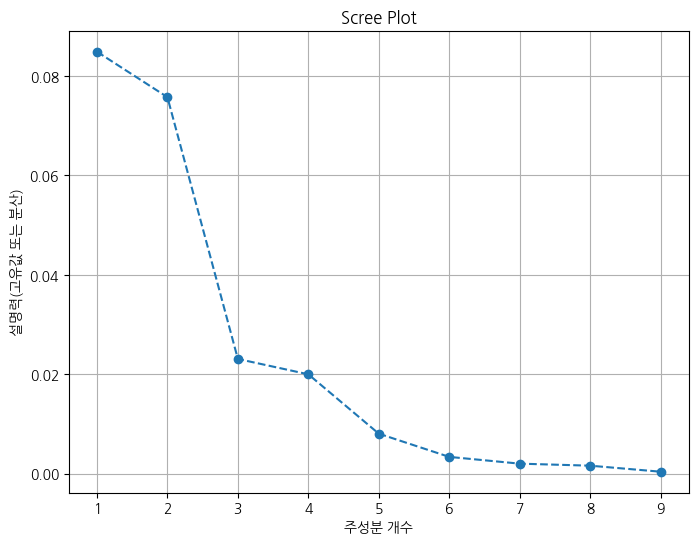

In [57]:
# PCA 모델 생성
pca = PCA()
pca.fit(ddf3)

# 고유값(설명력) 추출
explained_variance = pca.explained_variance_

# Scree plot 그리기
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('주성분 개수')
plt.ylabel('설명력(고유값 또는 분산)')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


In [58]:
# PCA 모델 생성 및 차원 축소 (n_components를 원하는 값으로 지정)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(ddf3)


In [59]:
pca_result

array([[-0.40712858,  0.8910513 ],
       [-0.48572708,  0.22876019],
       [-0.49773003, -0.03297069],
       [-0.44123269,  0.63285544],
       [-0.48592869,  0.01955548],
       [-0.4671112 ,  0.24586428],
       [-0.46573764, -0.0956116 ],
       [-0.47928063, -0.16972103],
       [-0.43041714,  0.22918384],
       [-0.46551151, -0.16782316],
       [-0.46028811, -0.14243702],
       [-0.45656836, -0.0040814 ],
       [-0.39078596,  0.53782684],
       [-0.4738132 , -0.20197212],
       [-0.45360153, -0.20292167],
       [-0.38324114,  1.03609102],
       [-0.4607692 , -0.11325103],
       [-0.43773899, -0.18551865],
       [-0.43887287, -0.18147169],
       [-0.413089  ,  0.04623336],
       [-0.42407103, -0.18212526],
       [-0.41748764, -0.07268967],
       [-0.40969668, -0.06151989],
       [-0.41733611, -0.10135769],
       [-0.3935714 ,  0.05738987],
       [-0.39613317, -0.08478699],
       [-0.3919194 , -0.12521384],
       [-0.37819165,  0.04000286],
       [-0.38094653,